In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/pck196/ML_Project/master/AutoData.csv")
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [ ]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


-As all the values have mean and median close to each other the data is not much skewed.

**Checking distribution of price column which is our dependant variable.**

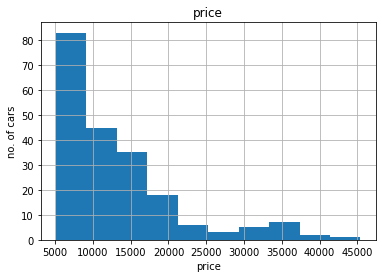

In [ ]:
df.hist('price')
plt.xlabel('price')
plt.ylabel('no. of cars')
plt.show()

-The mean price is 13276.71 while minimum and maximum values  are 5118 and 45400 respectively.

**Cleaning the data**

-Symbolising column has categorical data we have to caonvert it into numerical.

In [ ]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

In [ ]:
display (df[:5])
df['symboling']=LabelEncoder().fit_transform(df['symboling'])
display (df[:5])

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,5,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,5,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df['symboling'].unique()

array([5, 3, 4, 2, 1, 0])

-Make column gives us informoation about car model and its manufature name (company name). We don't need car model name for our analysis. Therefore we have to clean the make cloumn.

In [ ]:
df1= df["make"].str.split(" ",n =1,expand=True)
df["make"]=df1[0]
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,5,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,5,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

-As their are many repeated values with different spelling of same company we have to rectify it.

In [ ]:
df['make'] = df['make'].replace({'alfa-romero':'Alfa-Romeo','maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche',
                                 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
df['make'].unique()

array(['Alfa-Romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

-Make column have no repeated values. Now we have to Convert it into numerical.

In [ ]:
df['make']=LabelEncoder().fit_transform(df['make'])
df['make'].unique()

array([ 0,  2,  3,  5,  6,  7,  8,  9, 10,  4, 11, 12,  1, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [ ]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

-As their are ony two unique values we will convert it.

In [ ]:
df['fueltype']=LabelEncoder().fit_transform(df['fueltype'])
df['fueltype'].unique()

array([1, 0])

In [ ]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [ ]:
df['aspiration']=LabelEncoder().fit_transform(df['aspiration'])
df['aspiration'].unique()

array([0, 1])

In [ ]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [ ]:
df['doornumber']=LabelEncoder().fit_transform(df['doornumber'])
df['doornumber'].unique()

array([1, 0])

In [ ]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
df['carbody']=LabelEncoder().fit_transform(df['carbody'])
df['carbody'].unique()

array([0, 2, 3, 4, 1])

In [ ]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
df['drivewheel']=LabelEncoder().fit_transform(df['drivewheel'])
df['drivewheel'].unique()

array([2, 1, 0])

In [ ]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [ ]:
df['enginelocation']=LabelEncoder().fit_transform(df['enginelocation'])
df['enginelocation'].unique()

array([0, 1])

In [ ]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [ ]:
df['enginetype']=LabelEncoder().fit_transform(df['enginetype'])
df['enginetype'].unique()

array([0, 5, 3, 2, 6, 4, 1])

In [ ]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
df['cylindernumber']=LabelEncoder().fit_transform(df['cylindernumber'])
df['cylindernumber'].unique()

array([2, 3, 1, 4, 5, 6, 0])

In [ ]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [ ]:
df['fuelsystem']=LabelEncoder().fit_transform(df['fuelsystem'])
df['fuelsystem'].unique()

array([5, 1, 4, 0, 7, 2, 3, 6])

In [ ]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,5,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,5,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,4,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


-Now that all their are no categorical values remaining we can check the colrelation of values.

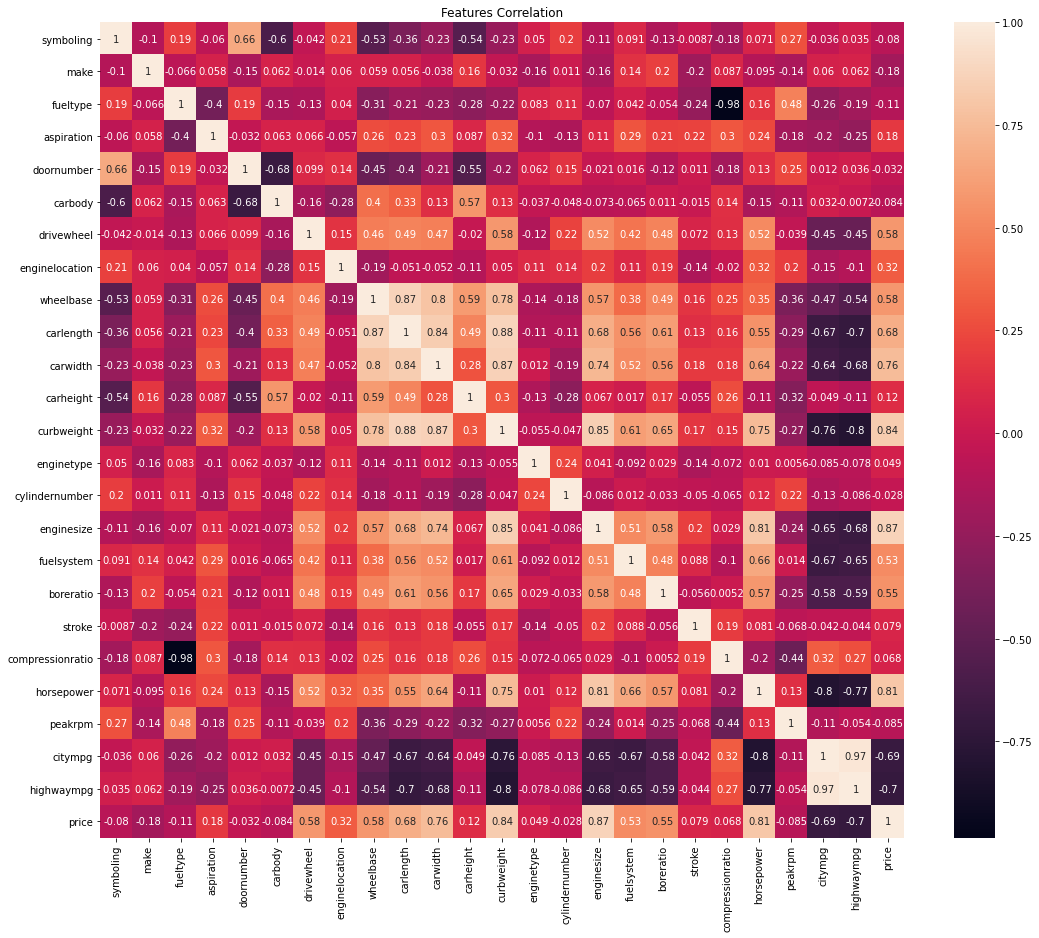

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True)
plt.title("Features Correlation")
plt.show()

-significantly corelated values are 'make', 'fueltype', 'aspiration', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg'.

-Dropping all the less corelated valiables.

In [ ]:
dcol = ['symboling', 'doornumber', 'carbody', 'enginetype', 'cylindernumber', 'stroke', 'compressionratio', 'peakrpm']

In [ ]:
df.drop( dcol, axis = 1, inplace = True)
mdl_1_shp=df.shape
df.shape

(205, 17)

In [ ]:
df.head()

,make,fueltype,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,111,21,27,13495.0
1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,111,21,27,16500.0
2,0,1,0,2,0,94.5,171.2,65.5,52.4,2823,152,5,2.68,154,19,26,16500.0
3,2,1,0,1,0,99.8,176.6,66.2,54.3,2337,109,5,3.19,102,24,30,13950.0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,136,5,3.19,115,18,22,17450.0


#Model 1

In [ ]:
X=df.drop(['price'],axis=1)
X.head()

,make,fueltype,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,111,21,27
1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,111,21,27
2,0,1,0,2,0,94.5,171.2,65.5,52.4,2823,152,5,2.68,154,19,26
3,2,1,0,1,0,99.8,176.6,66.2,54.3,2337,109,5,3.19,102,24,30
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,136,5,3.19,115,18,22


In [ ]:
y=df[['price']]
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(143, 16)
(62, 16)
(143, 1)
(62, 1)


In [ ]:
lr = LinearRegression()

#fit the data

model = lr.fit(X,y)

#Predict
y_pred = model.predict(X)

#calculate R2

R2 = model.score(X,y)

print("Value of R2 for model is:",R2)
print()
print("Model Intercept c: ", model.intercept_)
print()
print()
print("Model Slope m: ",model.coef_[0])
print()
print(X_train.columns)

Value of R2 for model is: 0.8742246860196823

Model Intercept c:  [-61509.51315356]


Model Slope m:  [-1.22353271e+02 -8.83291068e+02 -5.11801259e+02  1.25373874e+03
  1.43182302e+04  1.12550936e+02 -6.76182167e+01  8.38762089e+02
  1.52770086e+02  2.52448281e+00  6.45178111e+01 -4.22491655e+00
 -1.44406947e+03  3.74065363e+01 -3.27360293e+01 -1.60128171e+01]

Index(['make', 'fueltype', 'aspiration', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg',
       'highwaympg'],
      dtype='object')


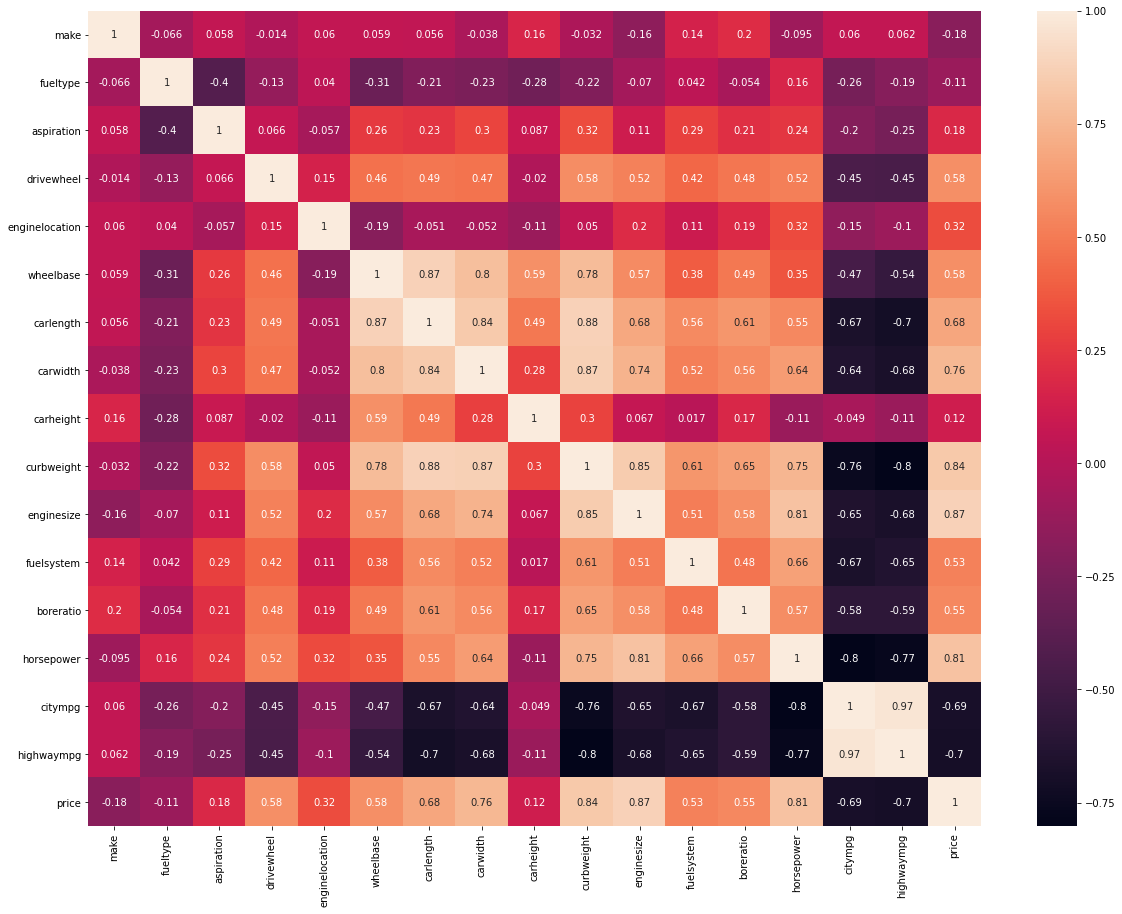

In [ ]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
heat_map = plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred_test = model.predict(X_test)
mdl_1_r2=r2_score(y_test, y_pred_test)
print(mdl_1_r2)

0.8617726136318982


**Lasso regression**

In [ ]:
# higher the alpha value, more restriction on the coefficients
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.01)
ls.fit(X_train, y_train)

ls100 = Lasso(alpha = 100)
ls100.fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

Lasso_train_score = ls.score(X_train, y_train)
Lasso_test_score = ls.score(X_test, y_test)

Lasso_train_score100 = ls100.score(X_train, y_train)
Lasso_test_score100 = ls100.score(X_test, y_test)

In [ ]:
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("-------------------------------------------------------------")
print ("lasso regression train score low alpha:", Lasso_train_score)
print ("lasso regression test score low alpha:", Lasso_test_score)
print ("-------------------------------------------------------------")
print ("lasso regression train score high alpha:", Lasso_train_score100)
print ("lasso regression test score high alpha:", Lasso_test_score100)

linear regression train score: 0.8802432495647441
linear regression test score: 0.8617726136318982
-------------------------------------------------------------
lasso regression train score low alpha: 0.8845280949998053
lasso regression test score low alpha: 0.8393083679144877
-------------------------------------------------------------
lasso regression train score high alpha: 0.8661490127207352
lasso regression test score high alpha: 0.8130717639373263


In [ ]:
print(X.columns.shape)
print(lr.coef_.shape)

(16,)
(1, 16)


In [ ]:
lrcof=lr.coef_
lrcof.shape=(16, 1)
lscof=ls.coef_
lscof.shape=(16, 1)
ls100cof=ls100.coef_
ls100cof.shape=(16, 1)

In [ ]:
list (zip(X.columns, lrcof)) # linear regression

[('make', array([-122.35327085])),
 ('fueltype', array([-883.29106768])),
 ('aspiration', array([-511.80125911])),
 ('drivewheel', array([1253.73874389])),
 ('enginelocation', array([14318.23021943])),
 ('wheelbase', array([112.55093587])),
 ('carlength', array([-67.61821666])),
 ('carwidth', array([838.76208882])),
 ('carheight', array([152.7700859])),
 ('curbweight', array([2.52448281])),
 ('enginesize', array([64.51781114])),
 ('fuelsystem', array([-4.22491655])),
 ('boreratio', array([-1444.06947351])),
 ('horsepower', array([37.40653626])),
 ('citympg', array([-32.7360293])),
 ('highwaympg', array([-16.0128171]))]

In [ ]:
list(zip(X.columns, ls100cof)) # lasso regression high alpha

[('make', array([-78.91462513])),
 ('fueltype', array([-0.])),
 ('aspiration', array([-0.])),
 ('drivewheel', array([833.34580418])),
 ('enginelocation', array([3761.70277541])),
 ('wheelbase', array([-0.])),
 ('carlength', array([-35.71724214])),
 ('carwidth', array([831.18240379])),
 ('carheight', array([124.95422928])),
 ('curbweight', array([1.82185189])),
 ('enginesize', array([75.52245768])),
 ('fuelsystem', array([8.97805432])),
 ('boreratio', array([-0.])),
 ('horsepower', array([37.9311476])),
 ('citympg', array([-0.])),
 ('highwaympg', array([-66.50205419]))]

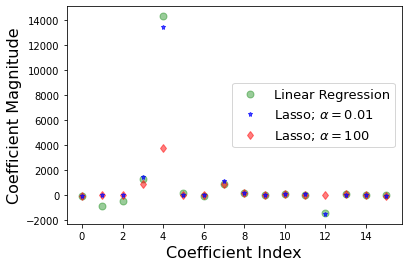

In [ ]:
plt.plot(lrcof,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.plot(lscof,alpha=0.7,linestyle='none',marker='*',markersize=5,color='blue',label=r'Lasso; $\alpha = 0.01$',zorder=7) 
# zorder for ordering the markers
plt.plot(ls100cof,alpha=0.5,linestyle='none',marker='d',markersize=6,color='red',label=r'Lasso; $\alpha = 100$') 
# alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=7)
plt.show()

-From the figure it clear that we can drop variables 'fueltype','aspiration','wheelbase','boreratio' and 'citympg'.

In [ ]:
dcol1 = ['fueltype', 'aspiration', 'wheelbase', 'boreratio', 'citympg']

In [ ]:
df.drop( dcol1, axis = 1, inplace = True)
mdl_2_shp=df.shape
df.shape

(205, 12)

In [ ]:
df.head()

,make,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,horsepower,highwaympg,price
0,0,2,0,168.8,64.1,48.8,2548,130,5,111,27,13495.0
1,0,2,0,168.8,64.1,48.8,2548,130,5,111,27,16500.0
2,0,2,0,171.2,65.5,52.4,2823,152,5,154,26,16500.0
3,2,1,0,176.6,66.2,54.3,2337,109,5,102,30,13950.0
4,2,0,0,176.6,66.4,54.3,2824,136,5,115,22,17450.0


#Model 2

In [ ]:
X=df.drop(['price'],axis=1)
X.head()

,make,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,horsepower,highwaympg
0,0,2,0,168.8,64.1,48.8,2548,130,5,111,27
1,0,2,0,168.8,64.1,48.8,2548,130,5,111,27
2,0,2,0,171.2,65.5,52.4,2823,152,5,154,26
3,2,1,0,176.6,66.2,54.3,2337,109,5,102,30
4,2,0,0,176.6,66.4,54.3,2824,136,5,115,22


In [ ]:
y=df[['price']]
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(143, 11)
(62, 11)
(143, 1)
(62, 1)


In [ ]:
#fit the data

model = lr.fit(X,y)

#Predict
y_pred = model.predict(X)

#calculate R2

R2 = model.score(X,y)

print("Value of R2 for model is:",R2)
print()
print("Model Intercept c: ", model.intercept_)
print()
print()
print("Model Slope m: ",model.coef_[0])
print()
print(X_train.columns)

Value of R2 for model is: 0.8718127713959452

Model Intercept c:  [-71133.03191282]


Model Slope m:  [-1.35083557e+02  1.44129154e+03  1.39993465e+04 -5.03205341e+01
  9.56929947e+02  2.14670430e+02  2.76860370e+00  6.71387524e+01
 -3.69290540e+00  2.75173882e+01 -1.38551067e+01]

Index(['make', 'drivewheel', 'enginelocation', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'fuelsystem', 'horsepower',
       'highwaympg'],
      dtype='object')


In [ ]:
y_pred_test = model.predict(X_test)
mdl_2_r2=r2_score(y_test, y_pred_test)
print(mdl_2_r2)

0.8548411888833869


In [ ]:
# higher the alpha value, more restriction on the coefficients
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.01)
ls.fit(X_train, y_train)

ls1000 = Lasso(alpha = 1000)
ls1000.fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

Lasso_train_score = ls.score(X_train, y_train)
Lasso_test_score = ls.score(X_test, y_test)

Lasso_train_score1000 = ls1000.score(X_train, y_train)
Lasso_test_score1000 = ls1000.score(X_test, y_test)

In [ ]:
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("-------------------------------------------------------------")
print ("lasso regression train score low alpha:", Lasso_train_score)
print ("lasso regression test score low alpha:", Lasso_test_score)
print ("-------------------------------------------------------------")
print ("lasso regression train score high alpha:", Lasso_train_score100)
print ("lasso regression test score high alpha:", Lasso_test_score100)

linear regression train score: 0.8800565296824331
linear regression test score: 0.8548411888833869
-------------------------------------------------------------
lasso regression train score low alpha: 0.8830601002443981
lasso regression test score low alpha: 0.8383009599753466
-------------------------------------------------------------
lasso regression train score high alpha: 0.8661490127207352
lasso regression test score high alpha: 0.8130717639373263


In [ ]:
print(X.columns.shape)
print(lr.coef_.shape)

(11,)
(1, 11)


In [ ]:
lrcof=lr.coef_
lrcof.shape=(11, 1)
lscof=ls.coef_
lscof.shape=(11, 1)
ls1000cof=ls1000.coef_
ls1000cof.shape=(11, 1)

In [ ]:
list (zip(X.columns, lrcof)) # linear regression

[('make', array([-135.08355712])),
 ('drivewheel', array([1441.29154082])),
 ('enginelocation', array([13999.34651406])),
 ('carlength', array([-50.32053407])),
 ('carwidth', array([956.92994747])),
 ('carheight', array([214.67042983])),
 ('curbweight', array([2.7686037])),
 ('enginesize', array([67.13875236])),
 ('fuelsystem', array([-3.6929054])),
 ('horsepower', array([27.51738822])),
 ('highwaympg', array([-13.85510668]))]

In [ ]:
list(zip(X.columns, ls1000cof)) # lasso regression high alpha

[('make', array([-61.82258506])),
 ('drivewheel', array([0.])),
 ('enginelocation', array([0.])),
 ('carlength', array([11.08801819])),
 ('carwidth', array([14.40357542])),
 ('carheight', array([0.])),
 ('curbweight', array([4.48279127])),
 ('enginesize', array([74.09656697])),
 ('fuelsystem', array([0.])),
 ('horsepower', array([50.42820473])),
 ('highwaympg', array([-0.]))]

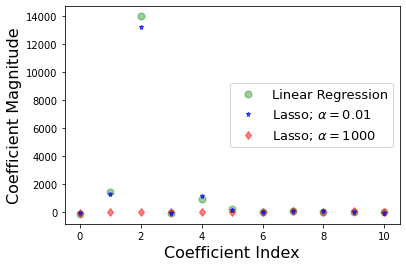

In [ ]:
plt.plot(lrcof,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.plot(lscof,alpha=0.7,linestyle='none',marker='*',markersize=5,color='blue',label=r'Lasso; $\alpha = 0.01$',zorder=7) 
# zorder for ordering the markers
plt.plot(ls1000cof,alpha=0.5,linestyle='none',marker='d',markersize=6,color='red',label=r'Lasso; $\alpha = 1000$') 
# alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=7)
plt.show()

-From the figure it clear that we can drop variables 'drivewheel', 'enginelocation','carwidth','carheight','fuelsystem' and 'highwaympg'.

In [ ]:
dcol2=['drivewheel', 'enginelocation','carwidth','carheight','fuelsystem','highwaympg']

In [ ]:
df.drop( dcol2, axis = 1, inplace = True)
mdl_3_shp=df.shape
df.shape

(205, 6)

In [ ]:
df.head()

,make,carlength,curbweight,enginesize,horsepower,price
0,0,168.8,2548,130,111,13495.0
1,0,168.8,2548,130,111,16500.0
2,0,171.2,2823,152,154,16500.0
3,2,176.6,2337,109,102,13950.0
4,2,176.6,2824,136,115,17450.0


#Model 3

In [ ]:
X_final=df.drop(['price'],axis=1)
X_final.head()

,make,carlength,curbweight,enginesize,horsepower
0,0,168.8,2548,130,111
1,0,168.8,2548,130,111
2,0,171.2,2823,152,154
3,2,176.6,2337,109,102
4,2,176.6,2824,136,115


In [ ]:
y_final=df[['price']]
y_final.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size = 0.3,random_state=42)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(143, 5)
(62, 5)
(143, 1)
(62, 1)


In [ ]:
#fit the data

model = lr.fit(X_final,y_final)

#Predict
y_final_pred = model.predict(X_final)

#calculate R2

R2 = model.score(X_final,y_final)

print("Value of R2 for model is:",R2)
print()
print("Model Intercept c: ", model.intercept_)
print()
print()
print("Model Slope m: ",model.coef_[0])
print()
print(X_train.columns)

Value of R2 for model is: 0.8208914599718281

Model Intercept c:  [-15624.81664475]


Model Slope m:  [-103.25779065   26.54345112    4.05791093   77.20663505   51.06409837]

Index(['make', 'carlength', 'curbweight', 'enginesize', 'horsepower'], dtype='object')


In [ ]:
y_final_pred_test = model.predict(X_test)
mdl_3_r2=r2_score(y_test, y_final_pred_test)
print(mdl_3_r2)

0.7978001366305901


In [ ]:
print("Model 1 accuracy:",mdl_1_r2)
print("Model 1 variables:",mdl_1_shp[1])
print("-------------------------------------------------------------")
print("Model 2 accuracy:",mdl_2_r2)
print("Model 2 variables:",mdl_2_shp[1])
print("-------------------------------------------------------------")
print("Model 3 accuracy:",mdl_3_r2)
print("Model 3 variables:",mdl_3_shp[1])

Model 1 accuracy: 0.8617726136318982
Model 1 variables: 17
-------------------------------------------------------------
Model 2 accuracy: 0.8548411888833869
Model 2 variables: 12
-------------------------------------------------------------
Model 3 accuracy: 0.7978001366305901
Model 3 variables: 6


**Although the number of variables are reduced from 17 to 6 in the final model, Accuracy of the model is only reduced by 7% which is acceptable.**

**The final Linear model equation can be written as:-**

**Price = - 15624.81 - (103.258 * make) + (26.543 * carlength) + (4.0578 * curbweight) + (77.207 * enginesize) + (51.064 * horsepower)**